## importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#used for preprocessing, modeling and dimensionality reduction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE

#for classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#for evaluation metrics
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    precision_score, 
    recall_score, 
    classification_report,
    confusion_matrix,
    roc_curve, 
    auc
)

In [2]:
#for plot styles
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
print("Libraries imported successfully.")   

#create directories for saving plots
os.makedirs('PLOTS/eda_plots', exist_ok=True)
os.makedirs('PLOTS/ml_algorithm_plots', exist_ok=True)
print("Libraries imported and plot directories created successfully.")

Libraries imported successfully.
Libraries imported and plot directories created successfully.


## data-loading

In [19]:
try:
    df = pd.read_csv('data_cleaning/shipbreaking_unified.csv')
    print("Unified dataset 'shipbreaking_unified.csv' loaded successfully.")
except FileNotFoundError:
    print("ERROR: 'shipbreaking_unified.csv' not found. Please run the integration script first.")
    exit()  

Unified dataset 'shipbreaking_unified.csv' loaded successfully.


## Phase 2: Data Integration & Exploratory Analysis

### general statistics of the dataset

In [17]:
#displaying dimensions
print("Shape of the dataset:")
print(df.shape)

#displaying first 5 rows
print("First 5 rows (head):")
print(df.head())

#displaying last 5 rows
print("Last 5 rows (tail):")
print(df.tail())

Shape of the dataset:
(7645, 11)
First 5 rows (head):
   YEAR      IMO                               NAME                    TYPE  \
0  2012  7705635  International Bulk Carrier S.p.A.            Bulk Carrier   
1  2012  7305502            Bluescope Steel Limited   Ro-Ro/Vehicle Carrier   
2  2012  9000948                 Teekay Corporation                  Tanker   
3  2012  6607525                 Abdulla Ahmed Nass  Offshore/Supply Vessel   
4  2012  8401353      Silvia Shipmanagement Limited            Bulk Carrier   

   GT      LDT   BUILT   AGE  LAST_FLAG         PLACE COUNTRY  
0 NaN  20586.0  1978.0  34.0   Cambodia  Alang, India   India  
1 NaN      NaN  1973.0  39.0  Australia  Alang, India   India  
2 NaN  17081.0  1991.0  21.0    Bahamas  Alang, India   India  
3 NaN      NaN  1966.0  46.0    Bahrain  Alang, India   India  
4 NaN      NaN  1985.0  27.0     Panama  Alang, India   India  
Last 5 rows (tail):
      YEAR      IMO               NAME            TYPE      GT     

In [18]:
#displaying summary of data
print("Data types and non-null value counts (info):")
df.info()

#displaying descriptive statisitcs
print("Descriptive statistics for numerical columns:")
print(df.describe())

#displaying number of missing values
print("Count of missing values per column:")
print(df.isnull().sum())

#displaying column names
print("Column names:")
print(df.columns)

Data types and non-null value counts (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       7645 non-null   int64  
 1   IMO        7645 non-null   int64  
 2   NAME       7645 non-null   object 
 3   TYPE       7645 non-null   object 
 4   GT         5178 non-null   float64
 5   LDT        3546 non-null   float64
 6   BUILT      7643 non-null   float64
 7   AGE        7643 non-null   float64
 8   LAST_FLAG  7645 non-null   object 
 9   PLACE      7645 non-null   object 
 10  COUNTRY    7645 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 657.1+ KB
Descriptive statistics for numerical columns:
              YEAR           IMO             GT            LDT         BUILT  \
count  7645.000000  7.645000e+03    5178.000000    3546.000000   7643.000000   
mean   2016.518247  8.412060e+06   23636.353611    9195.73

### Correlation Heatmap of Numeric Features Plot

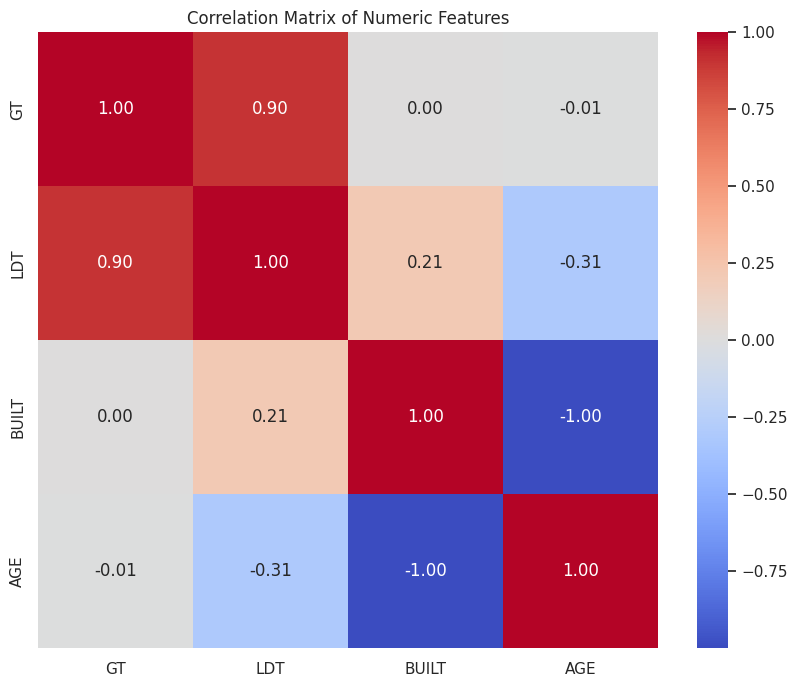

In [4]:
plt.figure(figsize=(10, 8))
numeric_cols = ['GT', 'LDT', 'BUILT', 'AGE']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f").set_title('Correlation Matrix of Numeric Features')
plt.savefig('PLOTS/eda_plots/Correlation_Matrix_of_Numeric_Features.png')
plt.show()

### Ships Dismantled Per Year Plot

/tmp/ipykernel_2269/2617083937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='YEAR', palette='viridis', order=sorted(df['YEAR'].unique()))


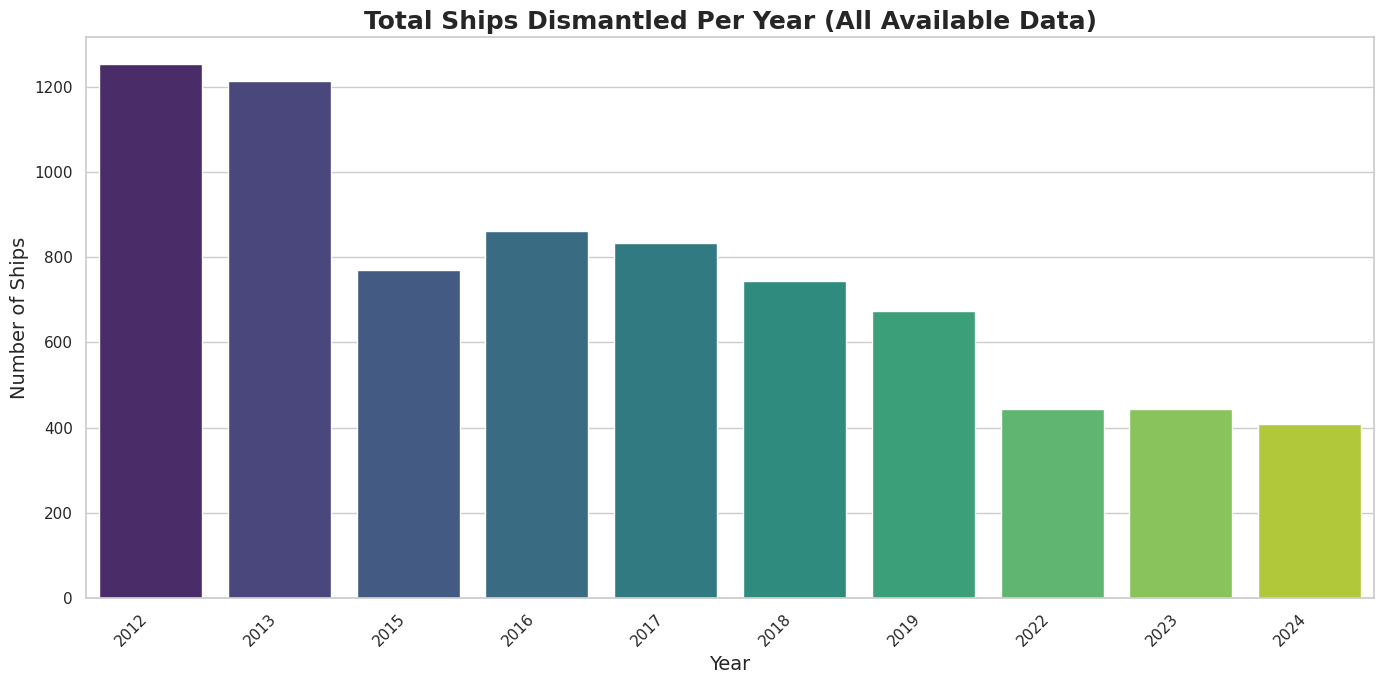

In [5]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=df, x='YEAR', palette='viridis', order=sorted(df['YEAR'].unique()))
ax.set_title('Total Ships Dismantled Per Year (All Available Data)', fontsize=18, fontweight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Ships', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('PLOTS/eda_plots/Total_Ships_Dismantled_Per_Year.png')
plt.show()

### Distribution of Ship Types and Ages Plot

/tmp/ipykernel_2269/1859924058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_types.index, x=top_types.values, palette='magma', orient='h').set(


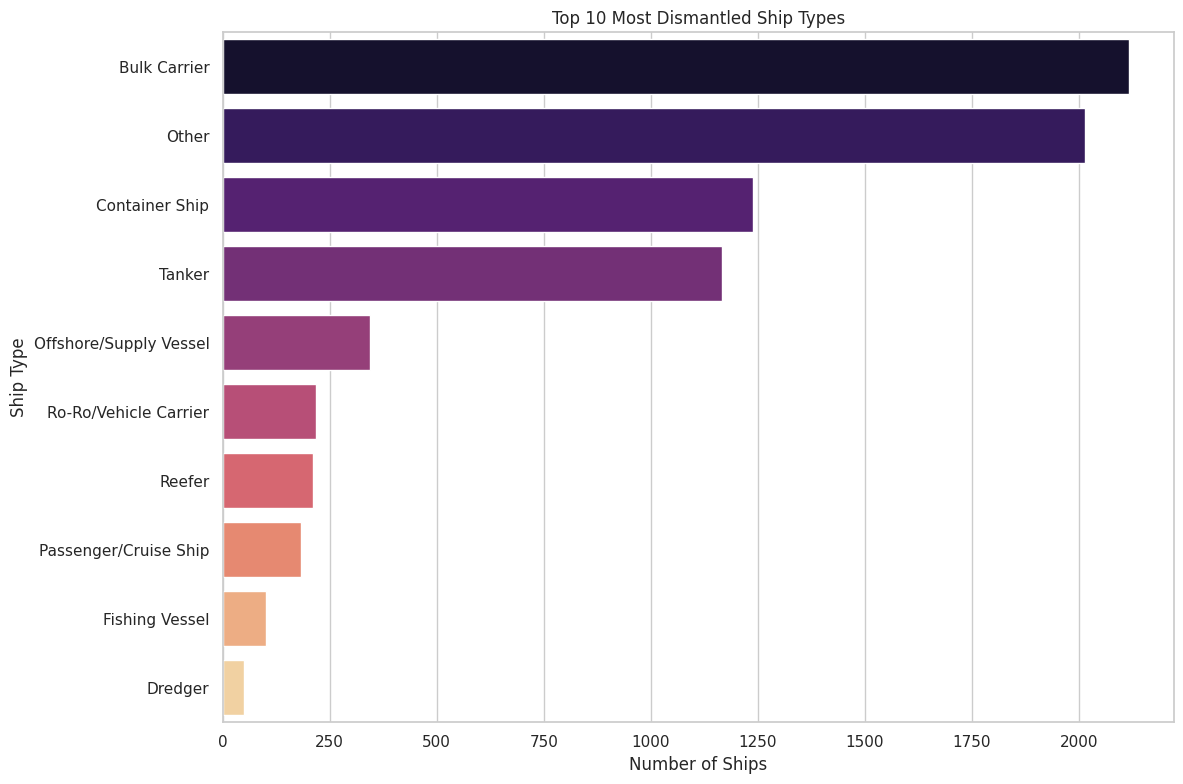

In [6]:
top_types = df['TYPE'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_types.index, x=top_types.values, palette='magma', orient='h').set(
    title='Top 10 Most Dismantled Ship Types',
    xlabel='Number of Ships',
    ylabel='Ship Type'
)
plt.tight_layout()
plt.savefig('PLOTS/eda_plots/Top_10_Most_Dismantled_Ship_Types.png')
plt.show()

### Distribution of Ship Ages Plot

Plotting age distribution for 7640 valid records.


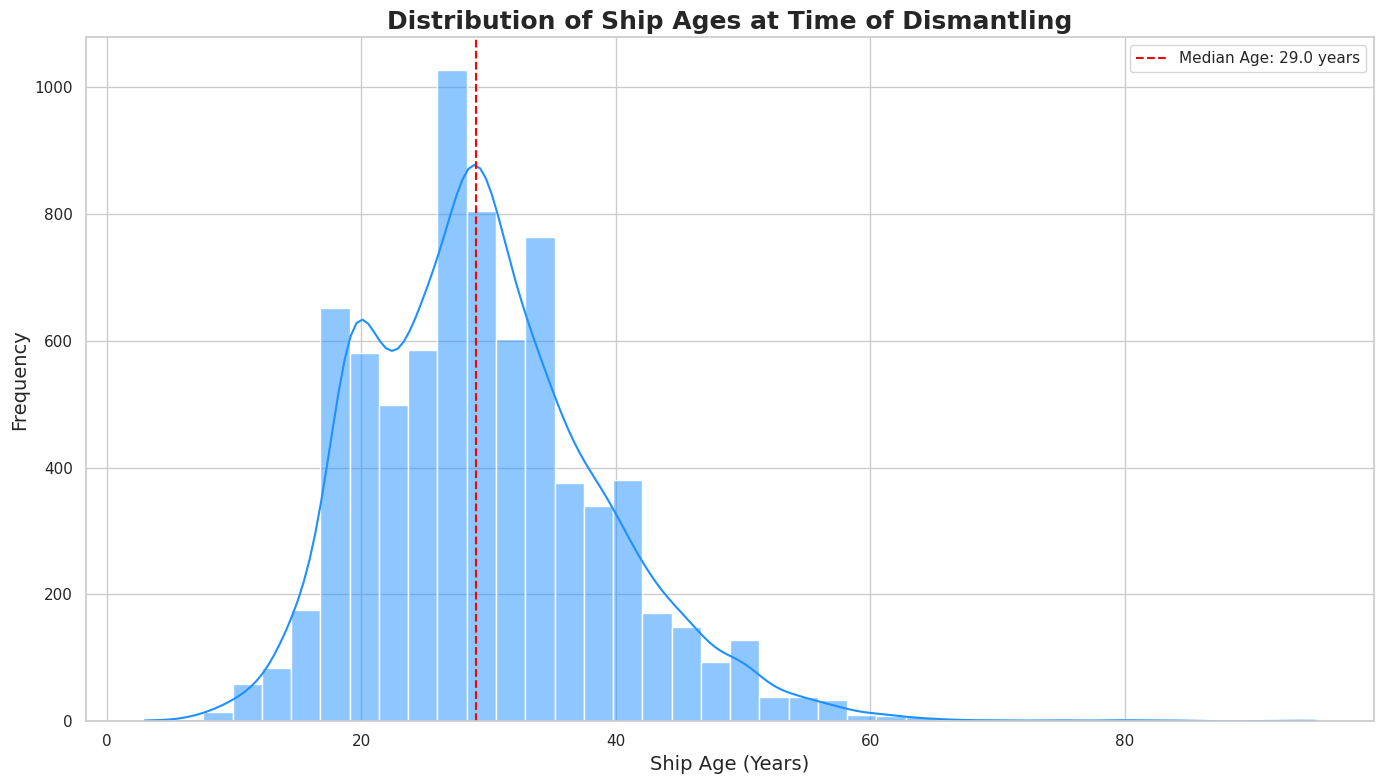

In [7]:
age_data = df['AGE'].dropna()
valid_age_data = age_data[(age_data >= 0) & (age_data <= 100)]
outlier_count = len(age_data) - len(valid_age_data)
print(f"Plotting age distribution for {len(valid_age_data)} valid records.")

plt.figure(figsize=(14, 8)) # Adjusted figsize for better readability
ax = sns.histplot(valid_age_data, kde=True, bins=40, color='dodgerblue')
ax.set_title('Distribution of Ship Ages at Time of Dismantling', fontsize=18, fontweight='bold')
ax.set_xlabel('Ship Age (Years)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
median_age = valid_age_data.median()
ax.axvline(median_age, color='red', linestyle='--', label=f'Median Age: {median_age:.1f} years')
ax.legend()
plt.tight_layout()
plt.savefig('PLOTS/eda_plots/Distribution_of_Ship_Ages_at_Time_of_Dismantling.png')
plt.show()

### Scatter Plot of LDT vs. Age

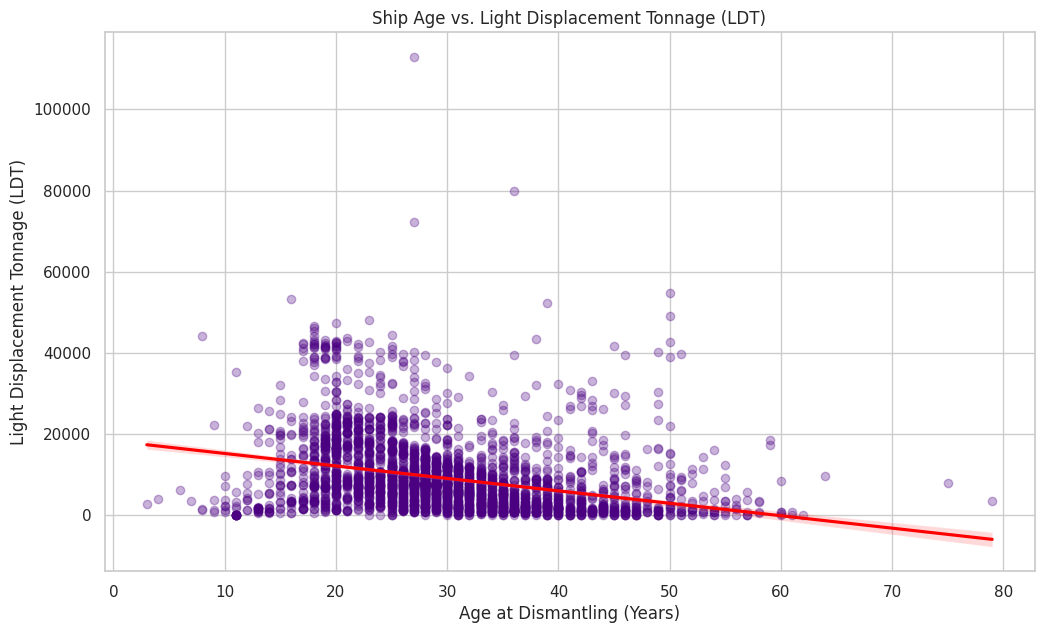

In [8]:
plt.figure(figsize=(12, 7))
sns.regplot(data=df[(df['AGE'] > 0) & (df['AGE'] < 80)], x='AGE', y='LDT',
            scatter_kws={'alpha':0.3, 'color': 'indigo'}, line_kws={'color': 'red'}).set(
    title='Ship Age vs. Light Displacement Tonnage (LDT)',
    xlabel='Age at Dismantling (Years)',
    ylabel='Light Displacement Tonnage (LDT)'
)
plt.savefig('PLOTS/eda_plots/Ship_Age_vs_Light_Displacement_Tonnage.png')
plt.show()

### Dismantling Trends Over Time for Top Countries Plot

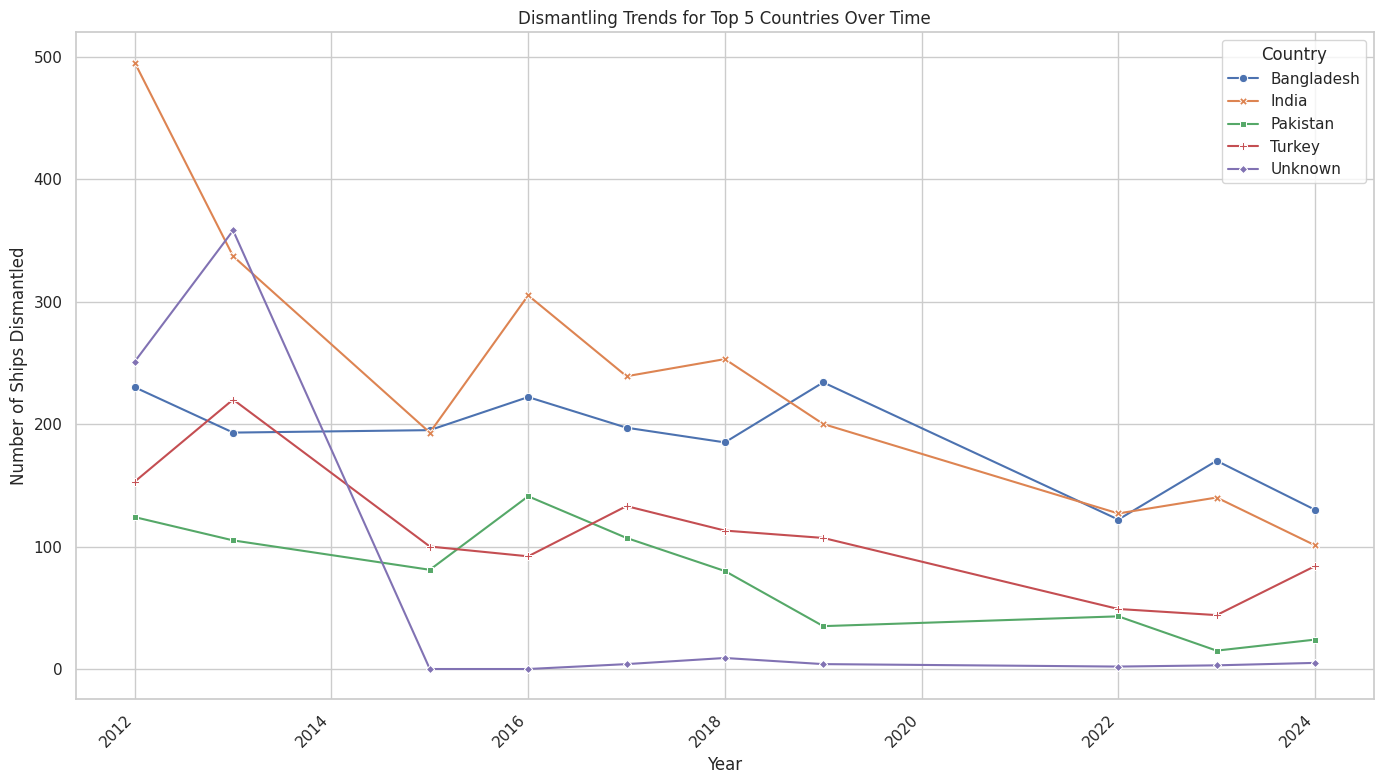

In [9]:
plt.figure(figsize=(14, 8))
top_5_countries = df['COUNTRY'].value_counts().nlargest(5).index
df_top_countries = df[df['COUNTRY'].isin(top_5_countries)]
trends = df_top_countries.groupby(['YEAR', 'COUNTRY']).size().unstack(fill_value=0)
sns.lineplot(data=trends, markers=True, dashes=False).set(
    title='Dismantling Trends for Top 5 Countries Over Time',
    xlabel='Year',
    ylabel='Number of Ships Dismantled'
)
plt.legend(title='Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('PLOTS/eda_plots/Dismantling_Trends_for_Top_5_Countries_Over_Time.png')
plt.show()

## Phase 3: Predictive Modeling

### Feature Engineering & Preprocessing

In [10]:
df_model = df.copy()
df_model['dismantling_region'] = df_model['COUNTRY'].apply(lambda x: 'South Asia' if x in ['Bangladesh', 'India', 'Pakistan'] else 'Other')
df_model.dropna(subset=['LDT', 'AGE', 'TYPE', 'LAST_FLAG'], inplace=True)
df_model = df_model[(df_model['AGE'] >= 0) & (df_model['AGE'] <= 100) & (df_model['TYPE'] != 'Unknown')].copy()

features = ['LDT', 'AGE', 'TYPE', 'LAST_FLAG']
target = 'dismantling_region'
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train_labels, y_test_labels = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
y_train = y_train_labels.apply(lambda x: 1 if x == 'South Asia' else 0)
y_test = y_test_labels.apply(lambda x: 1 if x == 'South Asia' else 0)

# Preprocessing pipelines
numeric_features = ['LDT', 'AGE']
categorical_features = ['TYPE', 'LAST_FLAG']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)], remainder='passthrough')

### t-SNE PLOT for feature space visualization


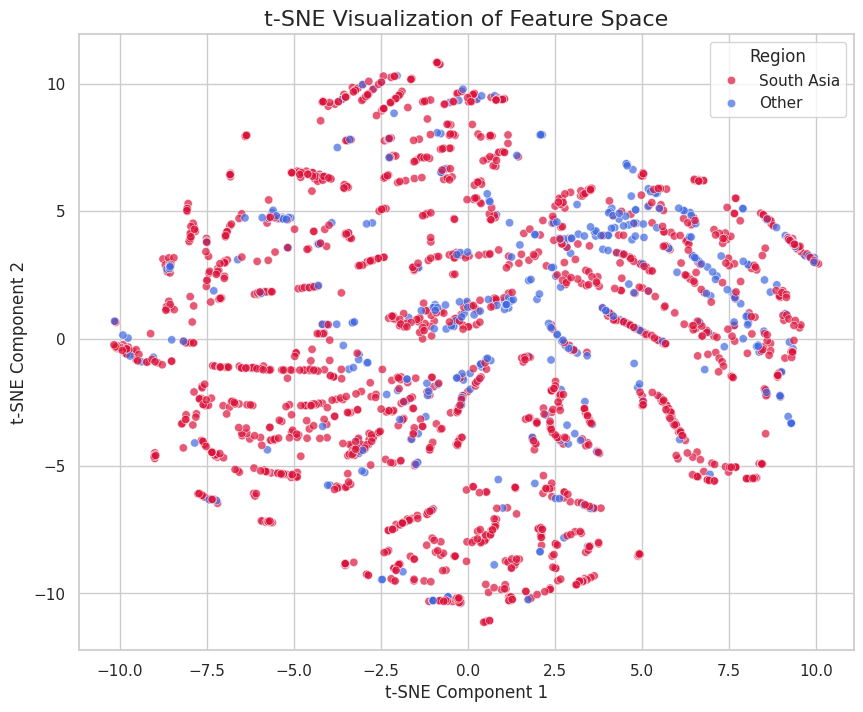

In [11]:
X_train_processed = preprocessor.fit_transform(X_train)
tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42)
tsne_results = tsne.fit_transform(X_train_processed)
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE-1', 'TSNE-2'])
tsne_df['Region'] = y_train_labels.values

plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='TSNE-1', y='TSNE-2', hue='Region', palette={'South Asia': 'crimson', 'Other': 'royalblue'}, alpha=0.7)
plt.title('t-SNE Visualization of Feature Space', fontsize=16)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Region')
plt.savefig('PLOTS/ml_algorithm_plots/t-SNE_Visualization_of_Feature_Space.png')
plt.show()

### Building, Training and Evaluation of Models


--- Training and Evaluating: k-NN ---
              precision    recall  f1-score   support

       Other       0.62      0.41      0.49       206
  South Asia       0.87      0.94      0.90       858

    accuracy                           0.84      1064
   macro avg       0.74      0.67      0.70      1064
weighted avg       0.82      0.84      0.82      1064



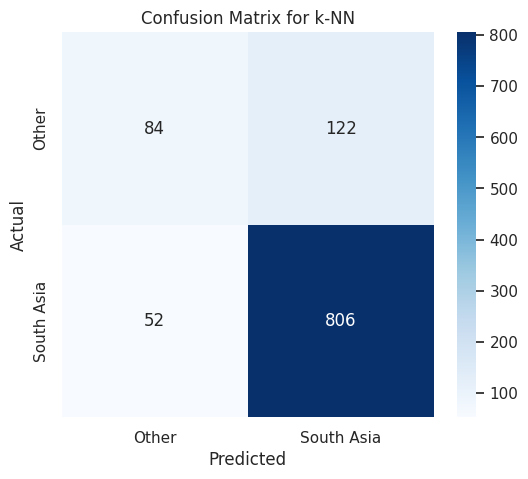


--- Training and Evaluating: Logistic Regression ---
              precision    recall  f1-score   support

       Other       0.72      0.39      0.51       206
  South Asia       0.87      0.96      0.91       858

    accuracy                           0.85      1064
   macro avg       0.79      0.68      0.71      1064
weighted avg       0.84      0.85      0.83      1064



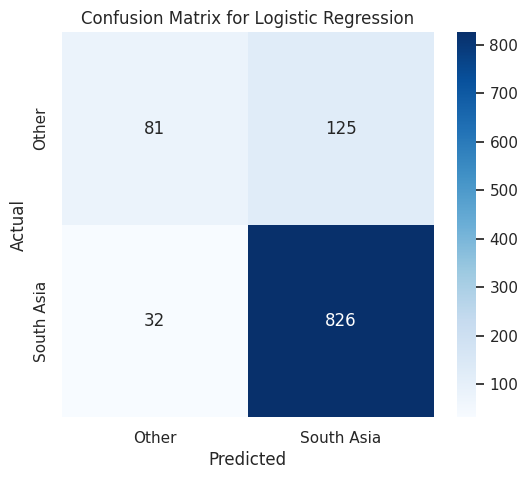


--- Training and Evaluating: SVM ---
              precision    recall  f1-score   support

       Other       0.75      0.37      0.50       206
  South Asia       0.87      0.97      0.91       858

    accuracy                           0.85      1064
   macro avg       0.81      0.67      0.71      1064
weighted avg       0.84      0.85      0.83      1064



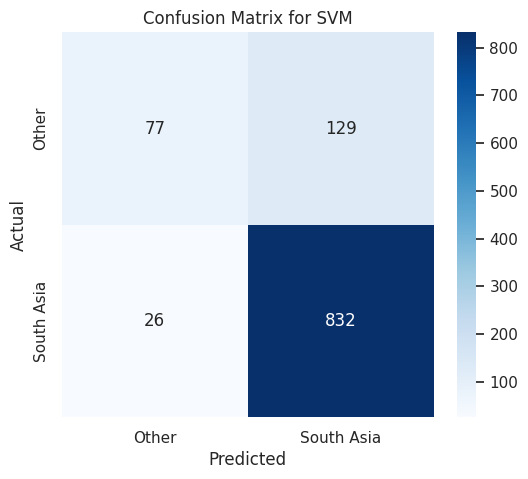


--- Training and Evaluating: Random Forest ---
              precision    recall  f1-score   support

       Other       0.64      0.49      0.56       206
  South Asia       0.88      0.93      0.91       858

    accuracy                           0.85      1064
   macro avg       0.76      0.71      0.73      1064
weighted avg       0.84      0.85      0.84      1064



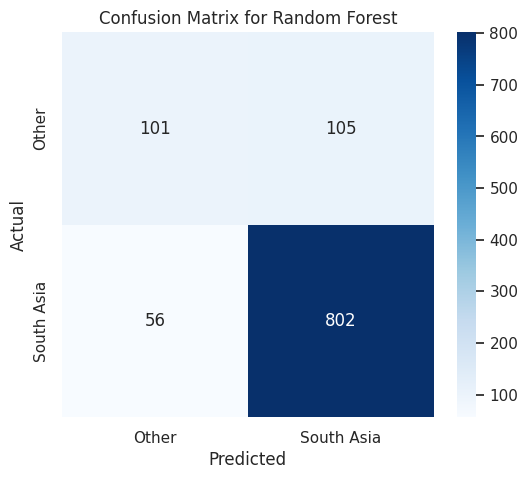


--- Training and Evaluating: Gradient Boosting ---
              precision    recall  f1-score   support

       Other       0.79      0.35      0.49       206
  South Asia       0.86      0.98      0.92       858

    accuracy                           0.86      1064
   macro avg       0.83      0.67      0.70      1064
weighted avg       0.85      0.86      0.83      1064



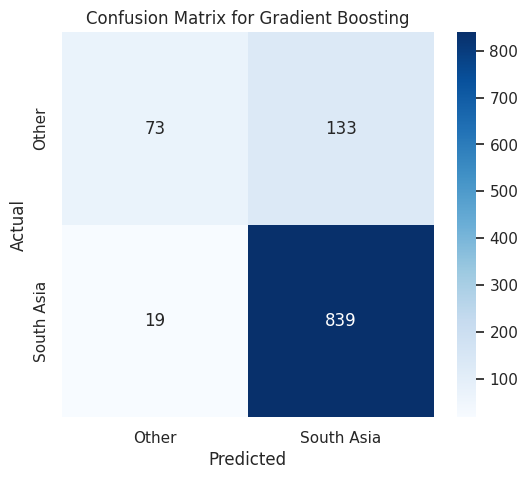


--- Training and Evaluating: Naive Bayes ---
              precision    recall  f1-score   support

       Other       0.20      0.95      0.34       206
  South Asia       0.90      0.11      0.19       858

    accuracy                           0.27      1064
   macro avg       0.55      0.53      0.26      1064
weighted avg       0.77      0.27      0.22      1064



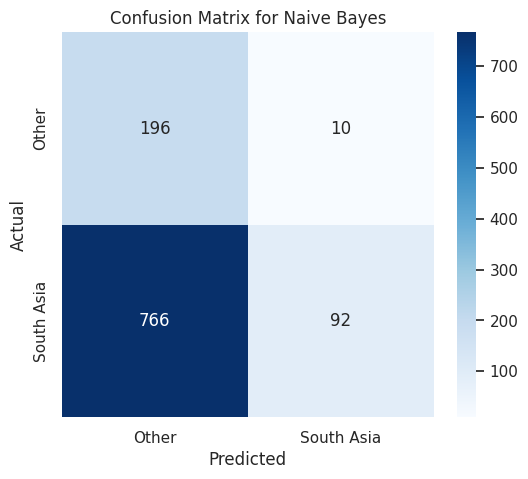

In [12]:
classifiers = {
    "k-NN": KNeighborsClassifier(n_neighbors=7),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
}

results = {}
roc_curves = {}

# Looping through each classifier algorithm
for name, classifier in classifiers.items():
    print(f"\n--- Training and Evaluating: {name} ---")

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    y_proba = model_pipeline.predict_proba(X_test)[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = {'fpr': fpr, 'tpr': tpr, 'auc': auc(fpr, tpr)}

    print(classification_report(y_test, y_pred, target_names=['Other', 'South Asia']))

    # Plotting confusion matrix for each algorithm
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Other', 'South Asia'], yticklabels=['Other', 'South Asia'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.savefig(f'PLOTS/ml_algorithm_plots/Confusion_Matrix_for_{name}.png')
    plt.show()

### ROC-AUC Curve Plot for showing Accuracies


--- Final Model Performance Summary ---
                     Accuracy  F1-Score  Precision    Recall
Gradient Boosting    0.857143  0.916940   0.863169  0.977855
SVM                  0.854323  0.914788   0.865765  0.969697
Logistic Regression  0.852444  0.913212   0.868559  0.962704
Random Forest        0.848684  0.908782   0.884234  0.934732
k-NN                 0.836466  0.902576   0.868534  0.939394
Naive Bayes          0.270677  0.191667   0.901961  0.107226


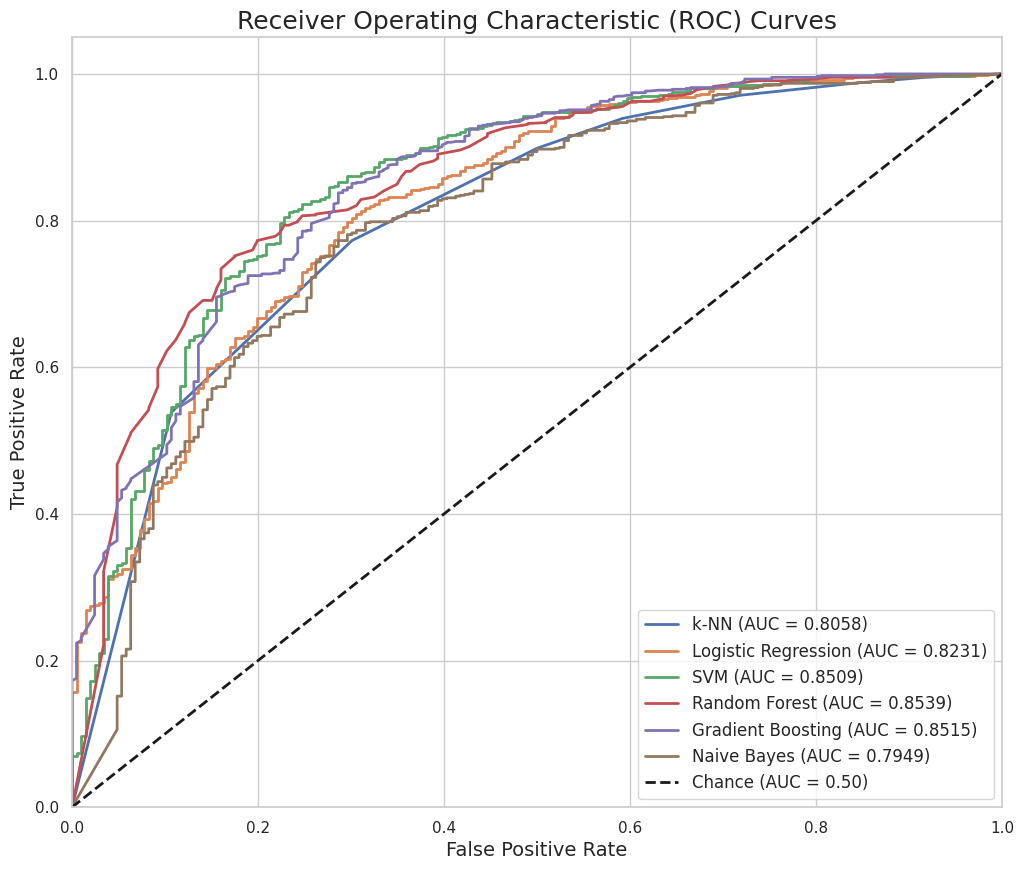

In [13]:
results_df = pd.DataFrame(results).T.sort_values(by='F1-Score', ascending=False)
print("\n--- Final Model Performance Summary ---")
print(results_df)

plt.figure(figsize=(12, 10))
for name, data in roc_curves.items():
    plt.plot(data['fpr'], data['tpr'], lw=2, label=f"{name} (AUC = {data['auc']:.4f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.savefig('PLOTS/ml_algorithm_plots/Receiver_Operating_Characteristic_Curves.png')
plt.show()

## Optional Bonus: Temporal Twist

/tmp/ipykernel_2269/2631684004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x='dismantling_region', y='AGE', palette='Set2').set(


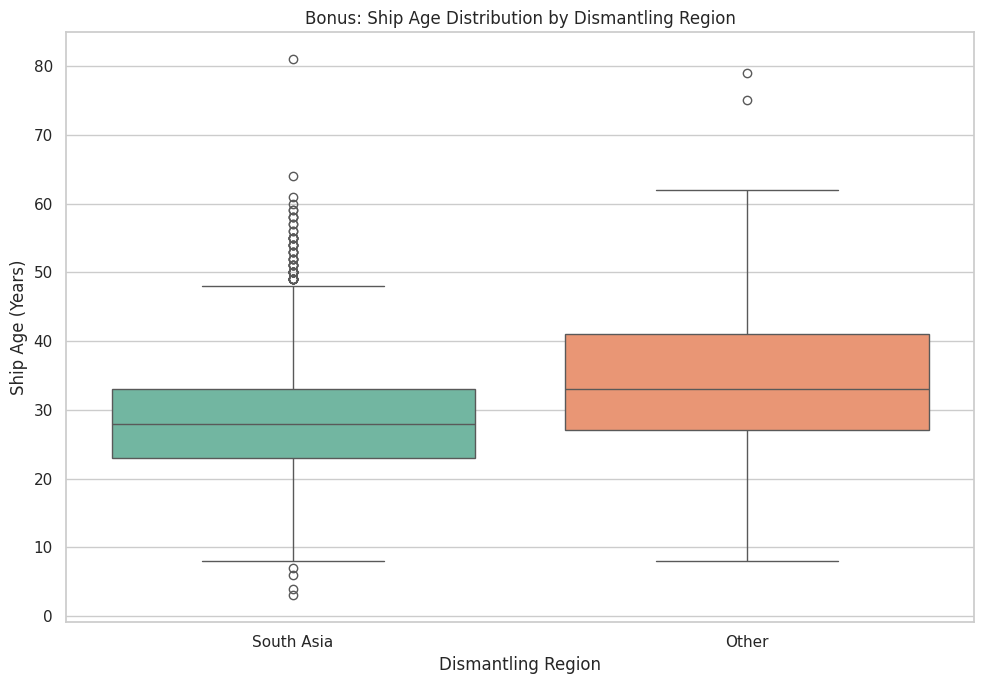

In [14]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_model, x='dismantling_region', y='AGE', palette='Set2').set(
    title='Bonus: Ship Age Distribution by Dismantling Region',
    xlabel='Dismantling Region',
    ylabel='Ship Age (Years)'
)
plt.tight_layout()
plt.savefig('PLOTS/eda_plots/Ship_Age_Distribution_by_Dismantling_Region.png')
plt.show()